In [774]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [775]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [776]:
SALARY_FIELD = 'Salary'

In [777]:
QUESTION_FIELD = 'IDE'

In [778]:
SALARY_MINIMUM = 0

In [779]:
AGG_FN = 'median'

In [780]:
qdf = pd.read_csv('./developer_survey_2017/survey_results_schema.csv').to_dict('s')
qs = dict(zip(qdf['Column'], qdf['Question']))

In [781]:
df = pd.read_csv('./developer_survey_2017/survey_results_public.csv')

In [782]:
df.dropna(subset=[SALARY_FIELD, QUESTION_FIELD], how='any', inplace=True)
df = df[df['Currency'] == 'U.S. dollars ($)']

In [783]:
smalldf = df[[SALARY_FIELD, QUESTION_FIELD]]

In [784]:
x = pd.DataFrame(smalldf[QUESTION_FIELD].astype(str).str.split(';').tolist(), index=smalldf[SALARY_FIELD])
x = x.reset_index()[[0, SALARY_FIELD]]
x.columns = [QUESTION_FIELD, SALARY_FIELD]
smalldf = x

In [785]:
smalldf = smalldf[smalldf[SALARY_FIELD] >= SALARY_MINIMUM]

In [786]:
groupby = smalldf.groupby(QUESTION_FIELD)

In [787]:
agg = groupby.agg(['count', AGG_FN]).reset_index()
sal = agg[SALARY_FIELD]
agg[SALARY_FIELD] = sal[sal['count'] > 50]
result = agg.dropna().sort_values([(SALARY_FIELD, AGG_FN)], ascending=False)
result

IDE Salary          
                    count    median
4            Emacs  225.0  105000.0
16             Vim  501.0  105000.0
6         IntelliJ   94.0  100000.0
3          Eclipse   88.0   96250.0
17   Visual Studio  338.0   92250.0
14    Sublime Text  764.0   87750.0
1             Atom  744.0   82000.0
9        Notepad++  952.0   82000.0
0   Android Studio   96.0   76000.0

In [788]:
num_respondents = result[(SALARY_FIELD, 'count')].sum()

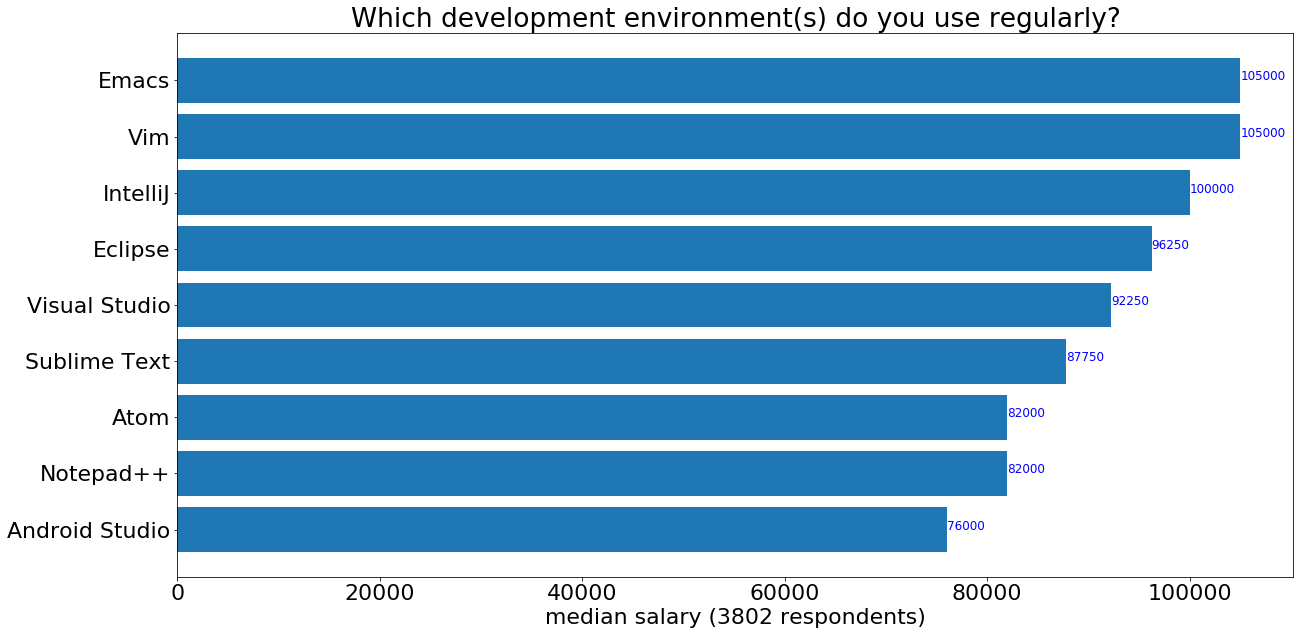

In [797]:
xs = result[QUESTION_FIELD]
xpos = np.arange(len(xs))[::-1]
ys = result[(SALARY_FIELD, AGG_FN)]
fig, ax = plt.subplots()    
plt.barh(xpos, ys)
plt.yticks(xpos, xs)
plt.xlabel('%s %s (%d respondents)' % (AGG_FN, SALARY_FIELD.lower(), num_respondents))
plt.title(qs[QUESTION_FIELD])
for i, v in enumerate(ys):
    plt.text(v, len(ys) - 1 - i, int(v), color='blue', fontweight='normal', fontsize=12)
plt.show()

In [790]:
groupby.std()

,Salary
IDE,
Android Studio,46983.173072
Atom,41635.740016
Coda,42336.468733
Eclipse,38512.234428
Emacs,43284.708084
IPython / Jupyter,41387.790231
IntelliJ,34951.334515
Komodo,25014.995503
NetBeans,50511.456577


In [791]:
groupby.median()

,Salary
IDE,
Android Studio,76000.0
Atom,82000.0
Coda,81250.0
Eclipse,96250.0
Emacs,105000.0
IPython / Jupyter,95680.0
IntelliJ,100000.0
Komodo,116500.0
NetBeans,96250.0


In [792]:
groupby.min()

,Salary
IDE,
Android Studio,200.000000
Atom,8.315058
Coda,35360.000000
Eclipse,80.000000
Emacs,70.000000
IPython / Jupyter,700.000000
IntelliJ,4200.000000
Komodo,90000.000000
NetBeans,45120.000000


In [793]:
groupby.max()

,Salary
IDE,
Android Studio,175000.0
Atom,195000.0
Coda,180000.0
Eclipse,187000.0
Emacs,195000.0
IPython / Jupyter,150000.0
IntelliJ,195000.0
Komodo,140000.0
NetBeans,184000.0
